In [1]:
import carla

import json
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
from env.CarlaEnv import CarlaEnv
from utils.VideoRecorder import VideoRecorder

In [3]:
with open('./cfg/weather.json', 'r', encoding='utf8') as fff:
    weather_params = json.load(fff)
with open('./cfg/scenario.json', 'r', encoding='utf8') as fff:
    scenario_params = json.load(fff)

In [4]:
carla_env = CarlaEnv(
    weather_params=weather_params,
    scenario_params=scenario_params,
    selected_weather="L1",
    selected_scenario="jaywalk",
    carla_rpc_port=12321,
    carla_tm_port=18935,
    carla_timeout=8,
    perception_type="dvs_frame",
    num_cameras=5,
    rl_image_size=84,
    fov=60,
    max_fps=45,
    min_fps=45,
    max_episode_steps=1000,
    frame_skip=1,
)

now at: same_dir_veh
	 spawn vehicle: 1, at Location(x=285.090179, y=199.155807, z=0.100000)
	 spawn vehicle: 2, at Location(x=182.938324, y=199.147507, z=0.100000)
now at: oppo_dir_veh
	 spawn vehicle: 3, at Location(x=242.087585, y=195.152313, z=0.100000)
	 spawn vehicle: 4, at Location(x=185.430878, y=195.147705, z=0.100000)
	 spawn vehicle: 5, at Location(x=233.157990, y=195.151596, z=0.100000)
	 spawn vehicle: 6, at Location(x=313.787262, y=195.158142, z=0.100000)
	 spawn walker: 1, at Location(x=295.037262, y=203.456619, z=0.100000)
	 spawn walker: 2, at Location(x=126.090469, y=203.442886, z=0.100000)
	 spawn walker: 3, at Location(x=112.539085, y=203.441788, z=0.100000)
	 spawn walker: 4, at Location(x=309.655334, y=203.457809, z=0.100000)
	 spawn walker: 5, at Location(x=322.957611, y=203.458893, z=0.100000)
	 spawn walker: 6, at Location(x=185.943573, y=203.447754, z=0.100000)
	 spawn walker: 7, at Location(x=268.715912, y=203.454483, z=0.100000)
	 spawn walker: 8, at Locatio

In [5]:
throttle = []
brake = []
velocity = []

In [6]:
video = VideoRecorder("./video", fps=120)
video.init(True)

In [7]:
for i in range(200):

    obs, reward, done, info = carla_env.step([0, 0.7])

    video.record(obs)

    if False:
        # 可视化↓↓↓↓↓↓
        axs = init_fig()
        axs["rgb"].imshow(sync_mode.rgb_data["img"])
        axs["dvs"].imshow(sync_mode.dvs_data["img"])
        axs["vidar"].imshow(sync_mode.vidar_data["img"])
        axs["hybrid_rgb_dvs"].imshow(
            np.clip(
                sync_mode.rgb_data["img"].astype(np.float32) + sync_mode.dvs_data["img"].astype(np.float32),
                0,
                255
            ).astype(np.uint8)
        )
        axs["hybrid_dvs_vidar"].imshow(sync_mode.dvs_data["img"] + sync_mode.vidar_data["img"])
        axs["big_rgb"].imshow(sync_mode.rgb_data["img"])
        # 可视化↑↑↑↑↑↑ 
        display.clear_output(wait=True)
        plt.pause(1)


    print("frame: {}, rgb-frame: {}/{}, dvs-frame: {}/{}".format(
        carla_env.frame, carla_env.rgb_data["frame"], carla_env.rgb_data["timestamp"],
        carla_env.dvs_data["frame"], carla_env.dvs_data["timestamp"],
    ))

    throttle.append(carla_env.vehicle.get_control().throttle)
    brake.append(carla_env.vehicle.get_control().brake)
    velocity.append(carla_env.vehicle.get_velocity().x)


#     carla_env.vehicle.apply_control(
#         carla.VehicleControl(throttle=0.7, brake=0)
#     )


frame: 135, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [137, 137, 137, 137, 137]/[3.031034511514008, 3.031034511514008, 3.031034511514008, 3.031034511514008, 3.031034511514008]
frame: 139, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [141, 141, 141, 141, 141]/[3.06436784658581, 3.06436784658581, 3.06436784658581, 3.06436784658581, 3.06436784658581]
frame: 143, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [144, 144, 144, 144, 144]/[3.089367847889662, 3.089367847889662, 3.089367847889662, 3.089367847889662, 3.089367847889662]
frame: 146, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [147, 147, 147, 147, 147]/[3.1143678491935134, 3.1143678491935134, 3.1143678491935134, 3.1143678491935134, 3.1143678491935134]
frame: 1

frame: 177, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [177, 177, 177, 177, 177]/[3.3643678622320294, 3.3643678622320294, 3.3643678622320294, 3.3643678622320294, 3.3643678622320294]
frame: 178, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [178, 178, 178, 178, 178]/[3.37270119599998, 3.37270119599998, 3.37270119599998, 3.37270119599998, 3.37270119599998]
frame: 179, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [179, 179, 179, 179, 179]/[3.3810345297679305, 3.3810345297679305, 3.3810345297679305, 3.3810345297679305, 3.3810345297679305]
frame: 180, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [180, 180, 180, 180, 180]/[3.389367863535881, 3.389367863535881, 3.389367863535881, 3.389367863535881, 3.389367863535881]
fra

frame: 210, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [210, 210, 210, 210, 210]/[3.639367876574397, 3.639367876574397, 3.639367876574397, 3.639367876574397, 3.639367876574397]
frame: 211, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [211, 211, 211, 211, 211]/[3.6477012103423476, 3.6477012103423476, 3.6477012103423476, 3.6477012103423476, 3.6477012103423476]
frame: 212, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [212, 212, 212, 212, 212]/[3.656034544110298, 3.656034544110298, 3.656034544110298, 3.656034544110298, 3.656034544110298]
frame: 213, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [213, 213, 213, 213, 213]/[3.6643678778782487, 3.6643678778782487, 3.6643678778782487, 3.6643678778782487, 3.6643678778782487

frame: 243, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [243, 243, 243, 243, 243]/[3.9143678909167647, 3.9143678909167647, 3.9143678909167647, 3.9143678909167647, 3.9143678909167647]
frame: 244, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [244, 244, 244, 244, 244]/[3.9227012246847153, 3.9227012246847153, 3.9227012246847153, 3.9227012246847153, 3.9227012246847153]
frame: 245, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [245, 245, 245, 245, 245]/[3.931034558452666, 3.931034558452666, 3.931034558452666, 3.931034558452666, 3.931034558452666]
frame: 246, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [246, 246, 246, 246, 246]/[3.9393678922206163, 3.9393678922206163, 3.9393678922206163, 3.9393678922206163, 3.93936789222

frame: 276, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [276, 276, 276, 276, 276]/[4.189367905259132, 4.189367905259132, 4.189367905259132, 4.189367905259132, 4.189367905259132]
frame: 277, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [277, 277, 277, 277, 277]/[4.197701239027083, 4.197701239027083, 4.197701239027083, 4.197701239027083, 4.197701239027083]
frame: 278, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [278, 278, 278, 278, 278]/[4.2060345727950335, 4.2060345727950335, 4.2060345727950335, 4.2060345727950335, 4.2060345727950335]
frame: 279, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [279, 279, 279, 279, 279]/[4.214367906562984, 4.214367906562984, 4.214367906562984, 4.214367906562984, 4.214367906562984]
fra

frame: 309, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [309, 309, 309, 309, 309]/[4.4643679196015, 4.4643679196015, 4.4643679196015, 4.4643679196015, 4.4643679196015]
frame: 310, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [310, 310, 310, 310, 310]/[4.472701253369451, 4.472701253369451, 4.472701253369451, 4.472701253369451, 4.472701253369451]
frame: 311, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [311, 311, 311, 311, 311]/[4.481034587137401, 4.481034587137401, 4.481034587137401, 4.481034587137401, 4.481034587137401]
frame: 312, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [312, 312, 312, 312, 312]/[4.489367920905352, 4.489367920905352, 4.489367920905352, 4.489367920905352, 4.489367920905352]
frame: 313, rgb-fr

frame: 343, rgb-frame: [0, 0, 99, 99, 100]/[0.0, 0.0, 2.7143678283318877, 2.7143678283318877, 2.7227011620998383], dvs-frame: [343, 343, 343, 343, 343]/[4.747701267711818, 4.747701267711818, 4.747701267711818, 4.747701267711818, 4.747701267711818]


In [8]:
video.save("test.mp4")

[swscaler @ 0x60fed80] Warning: data is not aligned! This can lead to a speed loss
[swscaler @ 0x6737d80] Warning: data is not aligned! This can lead to a speed loss


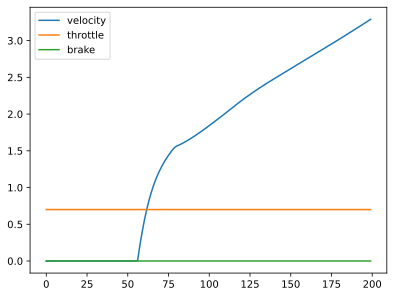

In [9]:
times = list(range(len(velocity)))

plt.plot(times, velocity, label="velocity")
plt.plot(times, throttle, label="throttle")
plt.plot(times, brake, label="brake")
plt.legend()